# Semi-Supervised VAE Project

## By VAEGen

### Imports

In [1]:
from plotting import plot_64, plot_64_m2, plot_loss_m1 ,plot_loss_m2, plot_interpolation, make_cm
from models import VAE, M1, M2
from training import run_epochs
from datasets import importMNIST, importFashionMNIST
from loaders import create_loader, create_subset
from classifiers import kneighbors_classifier
import torch

## Meta settings and init values

In [2]:
#Meta settings
dataset="mnist" #("mnist"/"fashion")
batch_size = 512
epochs = 2
latent_dim = 8
learning_rate = 1e-3
image_channels = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)

## Initial Values
model = None
dset_train = None
dset_test = None
train_loss = []
train_acc = []
test_loss = []
test_acc = []


In [3]:
## Importing Dataset
if dataset=="mnist":
    dset_train, dset_test = importMNIST()
elif dataset=="fashion":
    dset_train, dset_test = importFashionMNIST()

## Creating Loaders
train_loader = create_loader(dset_train,batch_size)
test_loader = create_loader(dset_test,batch_size)    

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/home/benjamin/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Binarized Datasets

Plotting non-binarized




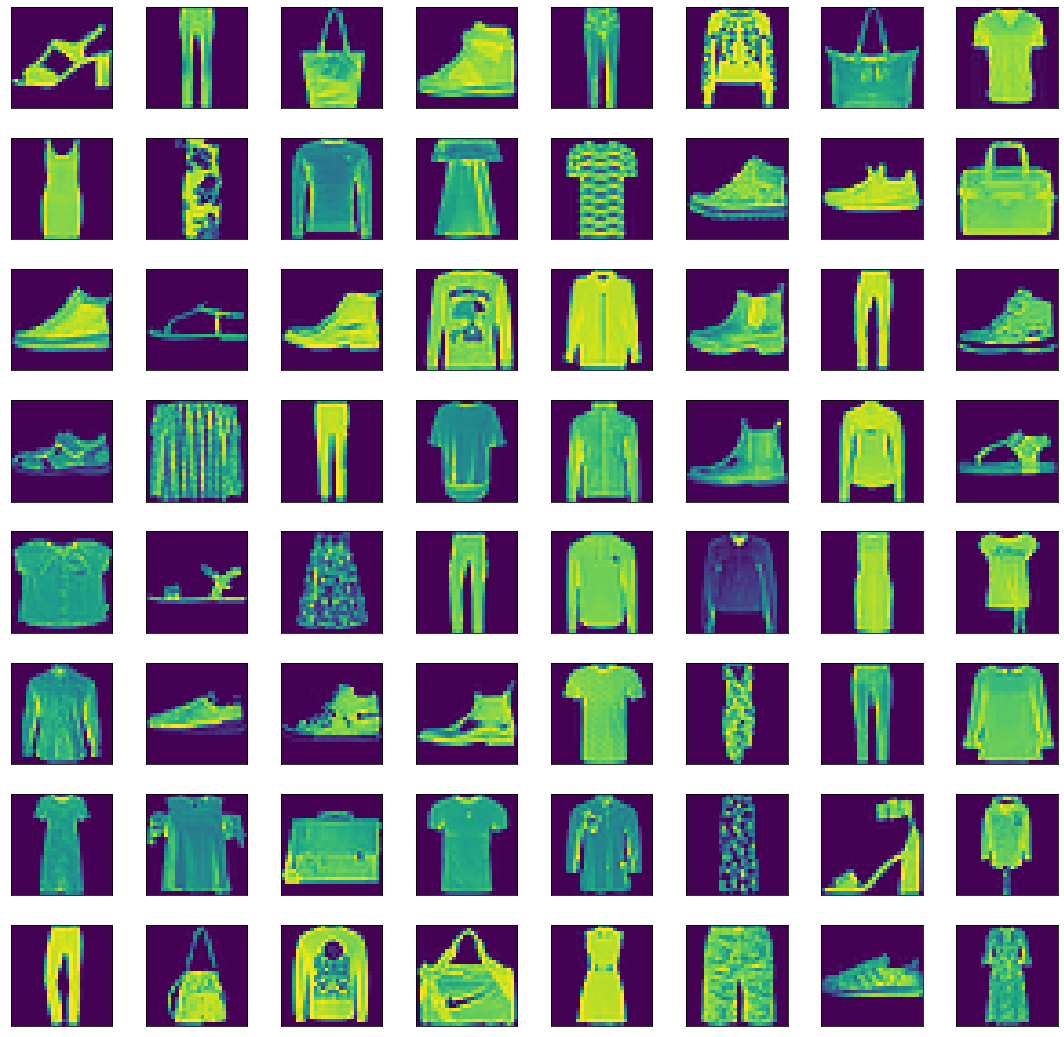

Plotting binarized


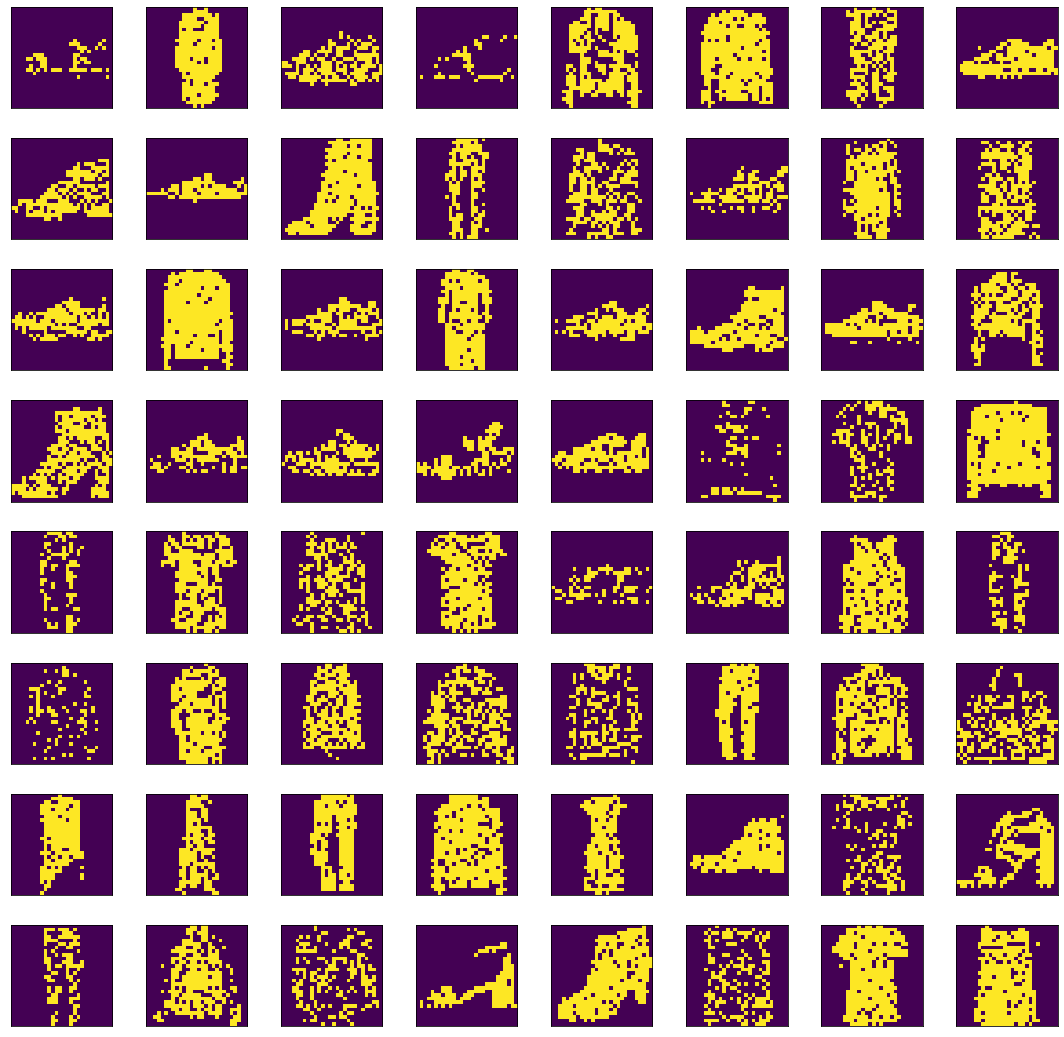

In [4]:
examples = enumerate(train_loader)

# Plot non-binarized
print("Plotting non-binarized")
plot_64(batch=examples)

dset_bin=None

if dataset=="mnist":
    dset_bin, _ = importMNIST(binarized=True)
    
if dataset=="fashion":
    dset_bin, _ = importFashionMNIST(binarized=True)

bin_loader = create_loader(dset_bin,batch_size)

examples = enumerate(bin_loader)
    
print("Plotting binarized")
plot_64(batch=examples)

## VAE

In [5]:
# define model and optimizer
model = VAE(model, image_channels=image_channels,h_dim=1024,z_dim=8).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [6]:
# Sample before training
print("Sampling before training")
plot_64(model=model, sample=True)

RuntimeError: cuDNN error: CUDNN_STATUS_NOT_INITIALIZED

In [ ]:
# Train network
run_epochs(mode, model, optimizer, epochs, train_loader, test_loader)


In [ ]:
# Sample after training
print("Sampling after training")
plot_examples(model=model, sample=True)